## https://rjn-2b.github.io/DSLimNguyen/

### Dataset description, motivation, and ideas 

Chanho Lim, Roland Nguyen
CMPS3660 Milestone 1

As listed above, Roland and Chanho are working together on this project. We are both from a similar background in math and computer science with our coursework emphasizing statistical analysis, but our interests and values vastly differ. Currently, we are considering two different themes that encompass multiple datasets that are vastly different from each other – municipality-level yield data from SIAP with temperature and rainfall data from CLICOM and the Google Play Store Apps (10k apps) compared to the Apple iOS App Store data (7200 apps). We have looked through the format of each dataset, leading us to believe that they are quite promising as we feel they can become tidy data with a bit of munging and melting, which will benefit us in organizing the data we want to perform our analysis. 


First, we want to competently predict corn yields in Mexico at disaggregated level through municipality-level yield data from SIAP and temperature and rainfall data from CLICOM. Chanho  has acquired this dataset from his Machine Learning study group where a few of his colleagues from different areas of study gather interesting ideas that can be used with Machine Learning. One of the biggest challenges we face with these datasets are understanding the columns and variables as they are written in Spanish and comprehending how crop yield predictions work. As such, we are currently looking into the Sustain group at Stanford to learn how to perform crop yield prediction analysis. Also, we are interested in bringing machine learning into this as we have seen examples from Stanford where they use deep Gaussian models using remote sensing data in Midwest America. 


 Second, the two of us frequently had arguments regarding the quality of apps within Google’s Android ecosystem as opposed to that of Apple’s iOS ecosystem relative to the price you are paying for those apps. For that reason, we have acquired the datasets of Google Play Store and Apple iOS App Store from Kaggle. Although we are a bit concerned about the usability of the Google Play Store dataset due to lack of relevant metadata such as the column descriptions, we wish to compare certain variables of similar apps from the two datasets and draw the differences in popularity, price, ratings and elasticity. These analyses can be done at multiple levels some of which may be less obvious yet just as interesting. We are considering are each app store, per genre, by content ratings, by price ranges, and per common app. Using such analyses, one could help answer such questions that many might have wondered. For example, what genres of apps are more profitable and for which markets? Is there a difference in popularity of certain genres in our datasets? For apps that both exist in the Apple App Store and Google Play Store, is there a general difference in price? If so, does that affect the ratings of the app? How does a titan in its genre space influence the popularity of the genre as a whole, for example Spotify boosting music apps or Twitter and Facebook boosting social media apps. How does the populace prefer paid apps as opposed to their free alternatives by app store? Informing a person of such knowledge may be able to sway them to the other side when it comes to their next smartphone.


### Resources
[Municipality-level yield data SIAP](http://infosiap.siap.gob.mx/gobmx/datosAbiertos.php)

[temp and rainfall from CLICOM](http://clicom-mex.cicese.mx/)

[Google Play Store dataset](https://www.kaggle.com/lava18/google-play-store-apps/download)

[Apple App Store](https://www.kaggle.com/ramamet4/app-store-apple-data-set-10k-apps)

[Deep Gaussian Process for Crop Yield Prediction Based on Remote Sensing Data](https://cs.stanford.edu/~ermon/papers/cropyield_AAAI17.pdf)

[Sustain Stanford](http://sustain.stanford.edu/crop-yield-analysis)

In [1]:
#import all necessary libraries and read csv files
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
ggplay_df = pd.read_csv("./googleplaystore.csv")
ggplay_user_df = pd.read_csv('./googleplaystore_user_reviews.csv')
apple_df = pd.read_csv('./AppleStore.csv')
apple_desc_df=pd.read_csv('./appleStore_description.csv')

### Clean the column variables from googleplaystore.csv and AppleStore.csv

First, we identified columns that we cannot match against the other (i.e. columns that are not present in the other dataframe). Then we dropped those columns, then we mapped the column variables so that they are easier to identify between both dataframes. 

In [2]:
ggplay_df = ggplay_df.drop(['Reviews','Current Ver', 'Android Ver', 'Last Updated','Size', 'Category'], axis = 1)
ggplay_df = ggplay_df.rename(columns = {'Genres' : 'Genre'})
ggplay_df['Price'] = ggplay_df.Price.map(lambda x: ''.join([i for i in x if i.isdigit() or i=='.']))
ggplay_df.Price = ggplay_df.Price.replace('', np.nan)
ggplay_df.Price = ggplay_df.Price.astype(np.float64)
rating_bins = [0.0, 0.5, 1.0, 1.5, 2.0, 2.5,3.0, 3.5, 4.0, 4.5, 5.0]
ggplay_df['bin_rating'] = pd.cut(ggplay_df['Rating'], rating_bins)


In [3]:
ggplay_df.Installs = ggplay_df.Installs.replace('Free', '0')
ggplay_df.Installs = ggplay_df.Installs.map(lambda x: ''.join([i for i in x if i.isdigit()]))
ggplay_df = ggplay_df.rename(columns = {'Installs' : 'Installs_plus'})
ggplay_df.Installs_plus.unique()
ggplay_df.Installs_plus = ggplay_df.Installs_plus.astype('int64')

In [4]:
apple_df = apple_df.rename(columns = {'user_rating' : 'Rating','track_name' : 'App', 'ver' : 'Current Ver', 'price' : 'Price', 'prime_genre' : 'Genres', 'size_bytes' : 'Size', 'cont_rating' : 'Content Rating'})
apple_df = apple_df.drop(['rating_count_tot','id', 'Size', 'Unnamed: 0','sup_devices.num', 'ipadSc_urls.num', 'lang.num', 'vpp_lic' , 'currency', 'Current Ver', 'user_rating_ver', 'rating_count_ver'], axis=1)
apple_df['Type'] = np.where(apple_df['Price'] == 0.00, 'Free', 'Paid')
apple_df = apple_df[['App', 'Rating', 'Type', 'Price', 'Content Rating', 'Genres']]

display(ggplay_df)
display(apple_df)

,App,Rating,Installs_plus,Type,Price,Content Rating,Genre,bin_rating
0,Photo Editor & Candy Camera & Grid & ScrapBook,4.1,10000,Free,0.0,Everyone,Art & Design,"(4.0, 4.5]"
1,Coloring book moana,3.9,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"(3.5, 4.0]"
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",4.7,5000000,Free,0.0,Everyone,Art & Design,"(4.5, 5.0]"
3,Sketch - Draw & Paint,4.5,50000000,Free,0.0,Teen,Art & Design,"(4.0, 4.5]"
4,Pixel Draw - Number Art Coloring Book,4.3,100000,Free,0.0,Everyone,Art & Design;Creativity,"(4.0, 4.5]"
...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,4.5,5000,Free,0.0,Everyone,Education,"(4.0, 4.5]"
10837,Fr. Mike Schmitz Audio Teachings,5.0,100,Free,0.0,Everyone,Education,"(4.5, 5.0]"
10838,Parkinson Exercices FR,NaN,1000,Free,0.0,Everyone,Medical,NaN
10839,The SCP Foundation DB fr nn5n,4.5,1000,Free,0.0,Mature 17+,Books & Reference,"(4.0, 4.5]"


,App,Rating,Type,Price,Content Rating,Genres
0,PAC-MAN Premium,4.0,Paid,3.99,4+,Games
1,Evernote - stay organized,4.0,Free,0.00,4+,Productivity
2,"WeatherBug - Local Weather, Radar, Maps, Alerts",3.5,Free,0.00,4+,Weather
3,"eBay: Best App to Buy, Sell, Save! Online Shop...",4.0,Free,0.00,12+,Shopping
4,Bible,4.5,Free,0.00,4+,Reference
...,...,...,...,...,...,...
7192,Kubik,4.5,Free,0.00,4+,Games
7193,VR Roller-Coaster,4.5,Free,0.00,4+,Games
7194,Bret Michaels Emojis + Lyric Keyboard,4.5,Paid,1.99,9+,Utilities
7195,VR Roller Coaster World - Virtual Reality,4.5,Free,0.00,12+,Games


We created a piechart for each dataframe, representing the portion of each genre by counting the values of each genre, then displaying the top 15 and the rest as etc. As shown below, we can see that games take up a huge portion of apple store dataset, whereas Google Playstore does not even contain games in the top 15. 

Text(0.5, 1.0, 'Google Play Store Genre Distribution')

<Figure size 1440x1440 with 0 Axes>

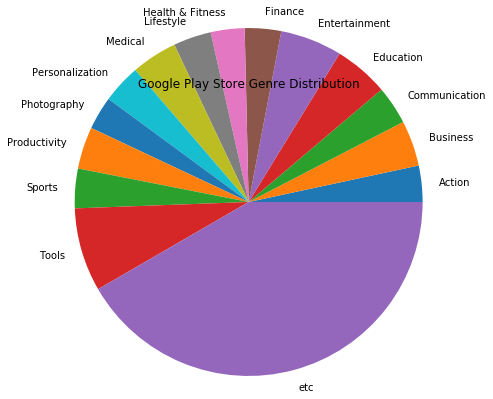

In [5]:
plt.figure(figsize = (20,20))
biggroups = ggplay_df.Genre.value_counts().index[:14]
def categorize(x):
    if x in biggroups: return x
    else: return "etc"
ggplay_df['Category'] = ggplay_df.Genre.apply(lambda x: categorize(x))
genres = ggplay_df.Category.value_counts().sort_index().index
size = ggplay_df.Category.value_counts().sort_index().tolist()
fig, ax = plt.subplots()
piechart = ax.pie(size, radius = 2, labels=genres)
plt.title('Google Play Store Genre Distribution')

Text(0.5, 1.0, 'AppStore Genre Distribution')

<Figure size 1440x1440 with 0 Axes>

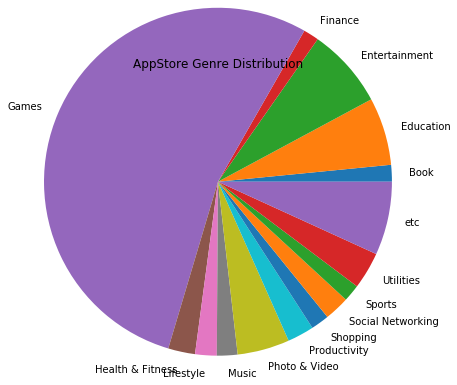

In [6]:
plt.figure(figsize = (20,20))
biggroups = apple_df.Genres.value_counts().index[:14]
def categorize(x):
    if x in biggroups: return x
    else: return "etc"
apple_df['Category'] = apple_df.Genres.apply(lambda x: categorize(x))
genres = apple_df.Category.value_counts().sort_index().index
size = apple_df.Category.value_counts().sort_index().tolist()
fig, ax = plt.subplots()
piechart = ax.pie(size, radius = 2, labels=genres)
plt.title('AppStore Genre Distribution')

Below we have used a countplot to represent the distribution of the app ratings for each dataframe.

The first of which shows for the AppStore. The AppStore ratings distribution is binned into intervals of 0.5, so we have chose to also bin the Google Play ratings in order to fully grasp the comparison between the two.

We see that in the both datasets, there is a high concentration of apps with ratings around 4.5.
Furthermore, we also see that Google Play Store has very few apps below 2 stars.

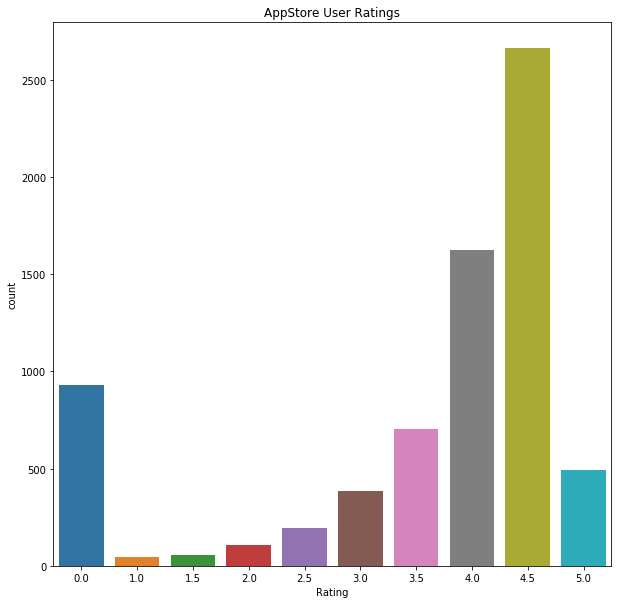

In [7]:
plt.figure(figsize = (10,10))
plt.title('AppStore User Ratings')
sns.countplot(x='Rating', data = apple_df)

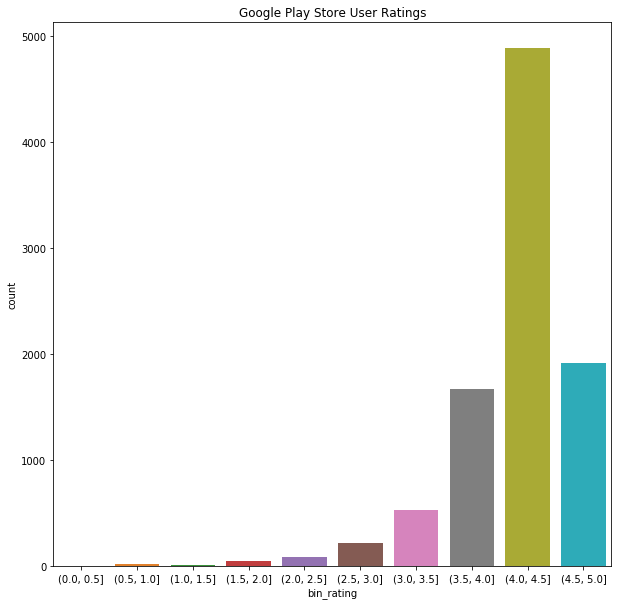

In [8]:
plt.figure(figsize = (10,10))
plt.title('Google Play Store User Ratings')
sns.countplot(x='bin_rating', data = ggplay_df)

In [9]:
print("Apple\n", apple_df.dtypes)
print("Google Playstore\n", ggplay_df.dtypes)

Apple
 App                object
Rating            float64
Type               object
Price             float64
Content Rating     object
Genres             object
Category           object
dtype: object
Google Playstore
 App                 object
Rating             float64
Installs_plus        int64
Type                object
Price              float64
Content Rating      object
Genre               object
bin_rating        category
Category            object
dtype: object
